Using TensorFlow backend.


   Unnamed: 0  internetActivity
0           2         50.432001
1           2         46.158441
2           2         35.017853
3           2         30.943659
4           2         32.049897


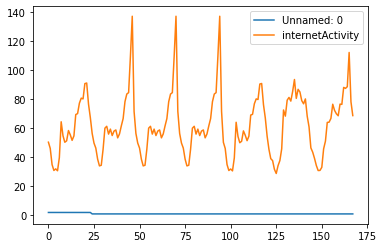

In [1]:
#https://github.com/ivanarielcaceres/timeseries-lstm-keras/blob/master/timeseries-prediction.ipynb
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np


df = pd.read_csv('g2.csv')
df=df.drop(['gridID','smsIn','smsOut','callIn','callOut'],axis=1)
print(df.head())
df.plot()


In [2]:

columns_to_keep = ['internetActivity']
df = df[columns_to_keep]
df['internetActivity'] = df['internetActivity'].apply(lambda x: x*1000)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 168


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,internetActivity
0,50432.000754
1,46158.440804
2,35017.852508
3,30943.659343
4,32049.896849


In [3]:
df.describe()

,internetActivity
count,168.000000
mean,62017.298694
std,20996.445589
min,28871.988261
25%,46480.756454
50%,58884.820675
75%,76683.349611
max,137260.205806


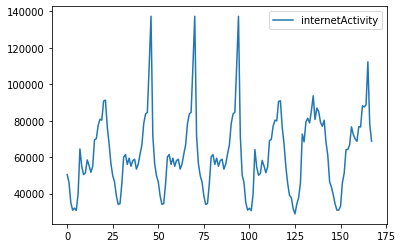

In [4]:
df.plot()

In [5]:
#null값
df.isnull().sum()

internetActivity    0
dtype: int64

In [6]:
print('Min', np.min(df))
print('Max', np.max(df))

Min internetActivity    28871.988261
dtype: float64
Max internetActivity    137260.205806
dtype: float64


In [7]:
dataset = df.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [8]:
print(scaled[:24])

[[0.19891473]
 [0.15948645]
 [0.05670233]
 [0.01911343]
 [0.02931969]
 [0.01740058]
 [0.10112466]
 [0.32882381]
 [0.23963485]
 [0.19864216]
 [0.20776207]
 [0.27312013]
 [0.24562279]
 [0.2107183 ]
 [0.23933122]
 [0.37494352]
 [0.38074023]
 [0.44719646]
 [0.47908806]
 [0.47430953]
 [0.57145109]
 [0.57540974]
 [0.44117377]
 [0.35526852]]


In [9]:
#Create RNN
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 117
test: 51


In [10]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [11]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

117 1
0
X 0 to 1
[0.19891473]
Y 1
0.15948645465844052
1
X 1 to 2
[0.15948645]
Y 2
0.05670232785440976
2
X 2 to 3
[0.05670233]
Y 3
0.019113434358144776
3
X 3 to 4
[0.01911343]
Y 4
0.029319686768286113
4
X 4 to 5
[0.02931969]
Y 5
0.017400576158421388
5
X 5 to 6
[0.01740058]
Y 6
0.10112466078073379
6
X 6 to 7
[0.10112466]
Y 7
0.3288238052866045
7
X 7 to 8
[0.32882381]
Y 8
0.23963485459260192
8
X 8 to 9
[0.23963485]
Y 9
0.19864215905662558
9
X 9 to 10
[0.19864216]
Y 10
0.20776206547621795
10
X 10 to 11
[0.20776207]
Y 11
0.2731201301391789
11
X 11 to 12
[0.27312013]
Y 12
0.24562279204990334
12
X 12 to 13
[0.24562279]
Y 13
0.2107183024592938
13
X 13 to 14
[0.2107183]
Y 14
0.2393312205371415
14
X 14 to 15
[0.23933122]
Y 15
0.37494352233155626
15
X 15 to 16
[0.37494352]
Y 16
0.3807402334387191
16
X 16 to 17
[0.38074023]
Y 17
0.44719645845555955
17
X 17 to 18
[0.44719646]
Y 18
0.4790880579163985
18
X 18 to 19
[0.47908806]
Y 19
0.4743095263989243
19
X 19 to 20
[0.47430953]
Y 20
0.571451091587125

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(115, 1, 1)
(49, 1, 1)


In [13]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 0s - loss: 0.0682
Epoch 2/100
 - 0s - loss: 0.0400
Epoch 3/100
 - 0s - loss: 0.0381
Epoch 4/100
 - 0s - loss: 0.0377
Epoch 5/100
 - 0s - loss: 0.0356
Epoch 6/100
 - 0s - loss: 0.0360
Epoch 7/100
 - 0s - loss: 0.0343
Epoch 8/100
 - 0s - loss: 0.0335
Epoch 9/100
 - 0s - loss: 0.0328
Epoch 10/100
 - 0s - loss: 0.0327
Epoch 11/100
 - 0s - loss: 0.0316
Epoch 12/100
 - 0s - loss: 0.0291
Epoch 13/100
 - 0s - loss: 0.0304
Epoch 14/100
 - 0s - loss: 0.0271
Epoch 15/100
 - 0s - loss: 0.0270
Epoch 16/100
 - 0s - loss: 0.0273
Epoch 17/100
 - 0s - loss: 0.0259
Epoch 18/100
 - 0s - loss: 0.0258
Epoch 19/100
 - 0s - loss: 0.0258
Epoch 20/100
 - 0s - loss: 0.0228
Epoch 21/100
 - 0s - loss: 0.0241
Epoch 22/100
 - 0s - loss: 0.0193
Epoch 23/100
 - 0s - loss: 0.0217
Epoch 24/100
 - 0s - loss: 0.0221
Epoch 25/100
 - 0s - loss: 0.0194
Epoch 26/100
 - 0s - loss: 0.0191
Epoch 27/100
 - 0s - loss: 0.0181
Epoch 28/100
 - 0s - loss: 0.0187
Epoch 29/100
 - 0s - loss: 0.0173
Epoch 30/100
 - 0s - lo

In [14]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
col=['gridID','Internet Activity Prediction']
list1={'gridID':[2],'Internet Activity Prediction':[testScore]}
record=pd.DataFrame(list1)
with open('predictions.csv','r') as infile:
          record.to_csv('predictions.csv',mode='a',header=False)

Train Score: 13164.78 RMSE
Test Score: 10007.81 RMSE


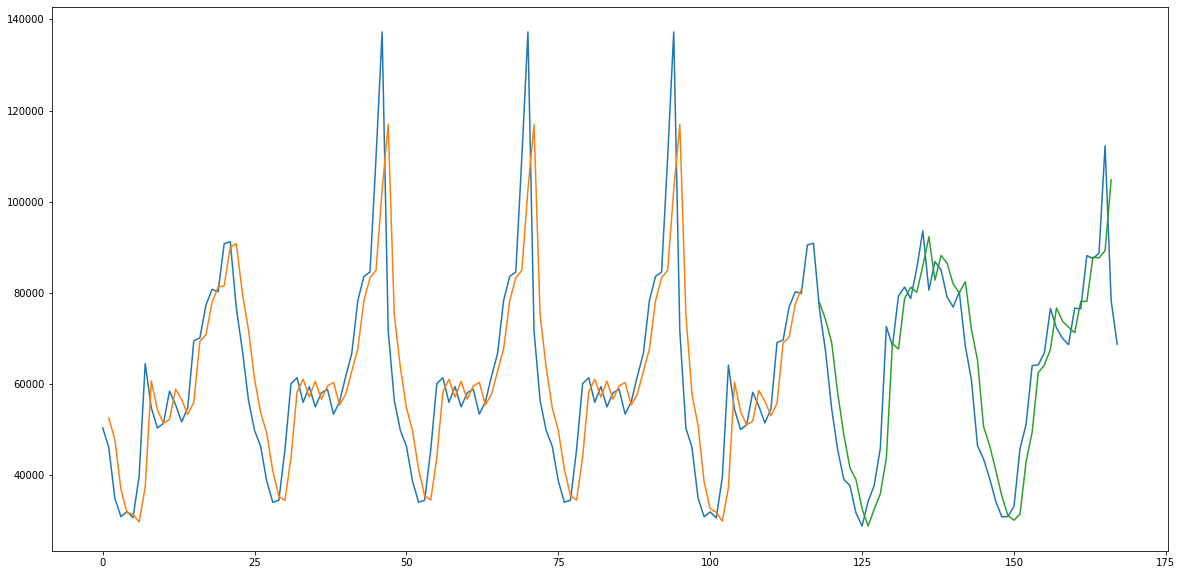

In [15]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()